# SEABORN Data analysis as a separate notebook

## Attempting to isolate the issues with the other notebook where the entire code stops working and plot features are not clearly defined or labeled. 

## Library Imports

In [69]:
import urllib

In [70]:
import os

In [71]:
import matplotlib.pyplot as plt

In [72]:
import pandas

In [73]:
formula, data, subset=None, drop_cols=None, *args, **kwargs)

## Load Seaborn matrix data

In [74]:
if not os.path.exists('wages.txt'):
    #Pull file if not already present on drive
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages','wages.txt')

In [75]:
# Assign Column Names
names = [     
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

In [76]:
short_names = [n.split(':')[0] for n in names]

In [77]:
data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, engine='python', sep=None, header=None)

In [78]:
data.columns = short_names

In [79]:
data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,11.36,29,3,5,0,0
530,12,0,1,33,0,6.10,51,1,5,0,1
531,17,0,1,25,1,23.25,48,1,5,0,1
532,12,1,0,13,1,19.88,31,3,5,0,1


In [11]:
# Transform Wage Data into multiplicative factors via log10 transormation
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

In [12]:
data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,1.055378,29,3,5,0,0
530,12,0,1,33,0,0.785330,51,1,5,0,1
531,17,0,1,25,1,1.366423,48,1,5,0,1
532,12,1,0,13,1,1.298416,31,3,5,0,1


/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Effect of Union Membership: 1=Union Member, 0=Non Union Member')

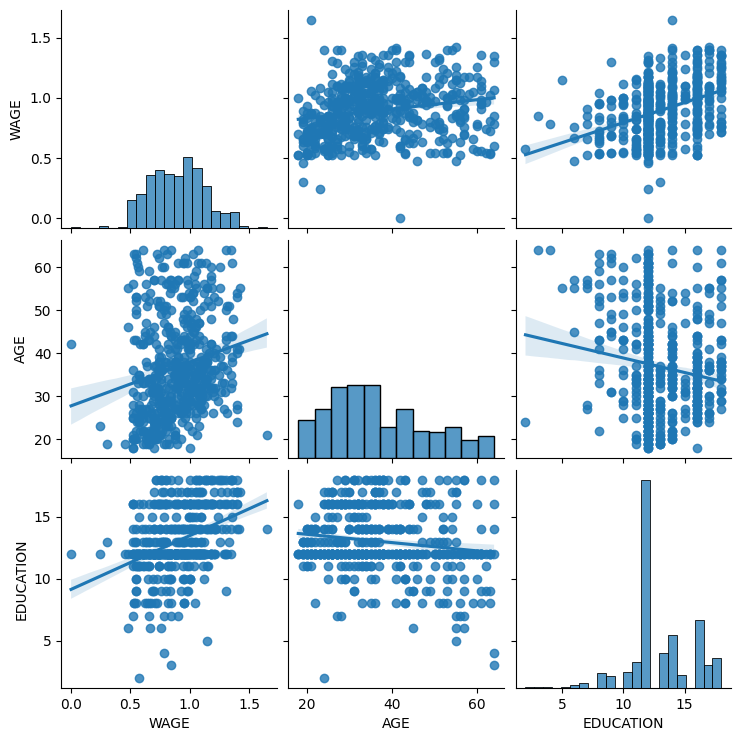

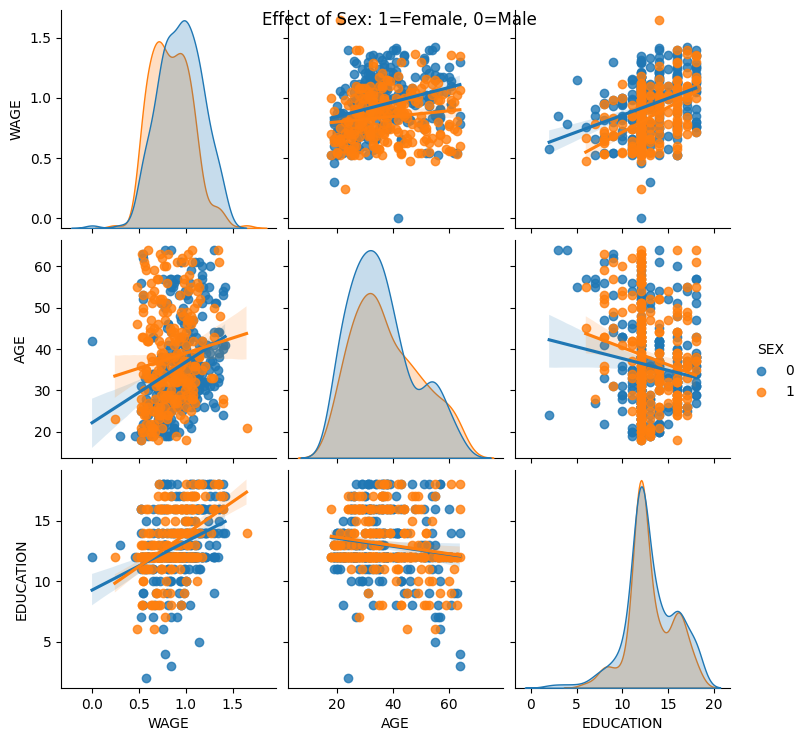

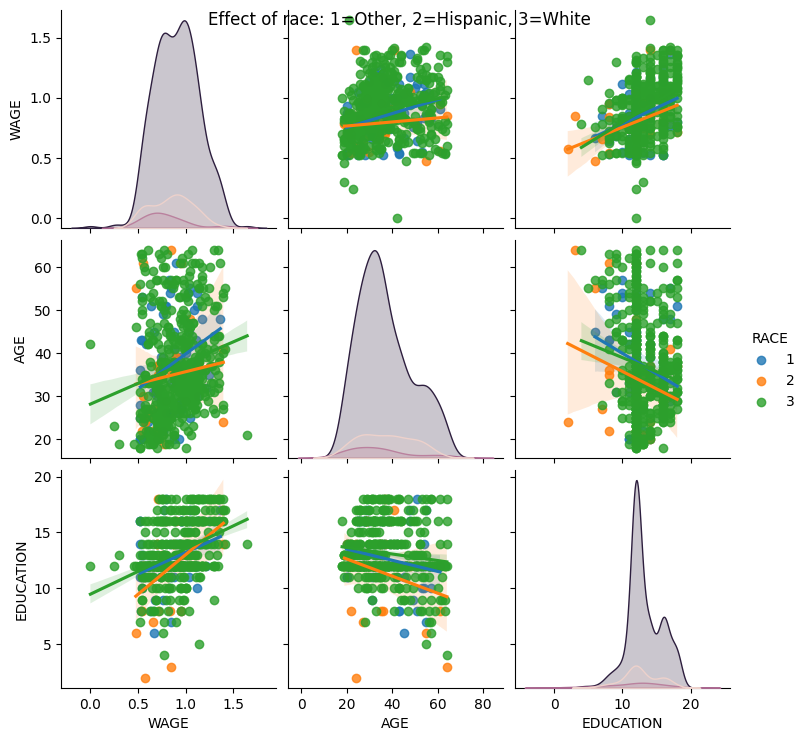

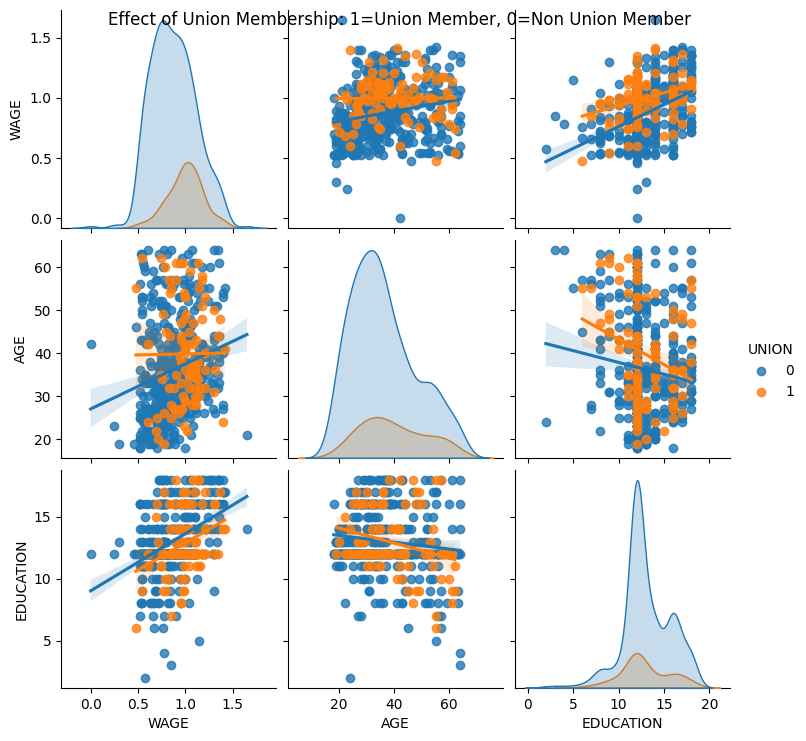

In [13]:
# Plotting scatter matrices for the different data sets in the set
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], 
                 kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')

plt.suptitle('Effect of Sex: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='RACE')

plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='UNION')

plt.suptitle('Effect of Union Membership: 1=Union Member, 0=Non Union Member')

## Linear Regression Modeling using seaborn

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Relationship of Wage and Education (in Years)')

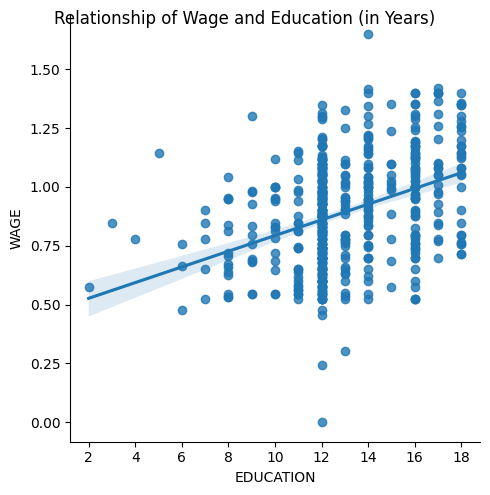

In [14]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)
plt.suptitle('Relationship of Wage and Education (in Years)')

In [80]:
import statsmodels.api as sm

In [81]:
from statsmodels.formula.api import ols

In [94]:
result = statsmodels.formula.api.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', 
                data=data).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.24e-24
Time:                        00:50:37   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1046      1.314      0.841